# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [28]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
import json
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.model_selection import train_test_split

In [8]:
data = pd.read_csv('data/valid.json')
data.head()

,"[{""targets"": ""0""","""graph"": [[1",0,0],[0,5,2]],"""contract_name"": ""15.sol""","""node_features"": [[0",1,...,0.96,0.97,0.98,0.99,0.100,0.101,0.102,0.103,0]]},Unnamed: 131
0,"{""targets"": ""0""","""graph"": [[1",0,0],[0,5,2]],"""contract_name"": ""15.sol""","""node_features"": [[0",1,...,0,0,0,0,0,0,0,0,0]]},NaN
1,"{""targets"": ""0""","""graph"": [[1",0,0],[0,5,2]],"""contract_name"": ""15.sol""","""node_features"": [[0",1,...,0,0,0,0,0,0,0,0,0]]},NaN
2,"{""targets"": ""0""","""graph"": [[1",0,0],[0,0,2]],"""contract_name"": ""223.sol""","""node_features"": [[0",1,...,0,0,0,0,0,0,0,0,0]]},NaN
3,"{""targets"": ""0""","""graph"": [[1",0,0],[0,0,2]],"""contract_name"": ""223.sol""","""node_features"": [[0",1,...,0,0,0,0,0,0,0,0,0]]},NaN
4,"{""targets"": ""0""","""graph"": [[1",0,0],[0,0,2]],"""contract_name"": ""223.sol""","""node_features"": [[0",1,...,0,0,0,0,0,0,0,0,0]]},NaN


In [9]:
data.columns

Index(['[{"targets": "0"', ' "graph": [[1', ' 0', ' 0]', ' [0', ' 5', ' 2]]',
       ' "contract_name": "15.sol"', ' "node_features": [[0', ' 1',
       ...
       ' 0.96', ' 0.97', ' 0.98', ' 0.99', ' 0.100', ' 0.101', ' 0.102',
       ' 0.103', ' 0]]}', 'Unnamed: 131'],
      dtype='object', length=132)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Columns: 132 entries, [{"targets": "0" to Unnamed: 131
dtypes: float64(1), int64(119), object(12)
memory usage: 343.5+ KB


In [11]:
file_path = 'data/valid.json'

In [12]:
with open(file_path, 'r') as f:
    data = json.load(f)

In [19]:
targets = []
graph_info = []
node_features = []

for entry in data:
    targets.append(entry["targets"])
    graph_info.append(entry["graph"])
    node_features.extend(entry["node_features"])

In [14]:
node_features_df = pd.DataFrame(node_features)

In [15]:
stats = node_features_df.describe()

In [20]:
graph_stats = {
    "nodes": [len(set(range(len(graph)))) for graph in graph_info],
    "edges": [sum(sum(1 for _ in row if _ > 0) for row in graph) for graph in graph_info],
}

In [22]:
graph_stats_df = pd.DataFrame(graph_stats)
graph_stats_df.columns = ['Number of Nodes', 'Number of Edges']

In [23]:
graph_stats_df.to_csv('graph_stats.csv', index=False)

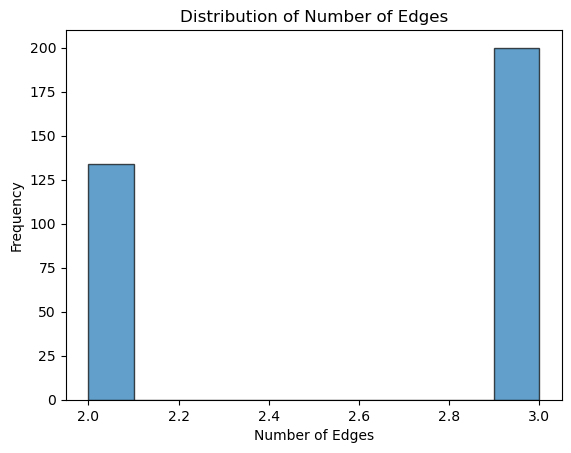

In [24]:
plt.hist(graph_stats_df['Number of Edges'], bins=10, alpha=0.7, edgecolor='black')
plt.title("Distribution of Number of Edges")
plt.xlabel("Number of Edges")
plt.ylabel("Frequency")
plt.savefig('edge_distribution.png')  
plt.show()

In [25]:
graph_stats_df['Target'] = targets

In [29]:
node_features_mean = node_features_df.mean(axis=0)
combined_features = pd.concat(
    [graph_stats_df.drop(columns=['Target']), pd.DataFrame(node_features_mean).T],
    axis=1
)
combined_features['Target'] = targets

In [30]:
combined_features.columns = [f'Feature_{i}' for i in range(combined_features.shape[1] - 1)] + ['Target']

In [31]:
X = combined_features.drop(columns=['Target'])
y = combined_features['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

print("Data has been successfully prepared and split into training and testing sets.")

Data has been successfully prepared and split into training and testing sets.
